<a href="https://colab.research.google.com/github/diamantidisgeorgios/exercise9/blob/main/exercise_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install libraries

In [1]:
!pip install swig

In [2]:
!pip install gymnasium

In [3]:
!pip install box2d

In [4]:
!pip install renderlab

#Basic functions

Every gymnasium environment has 3 basic functions: step, reset, and render.
Step: updates an environment with actions.
Reset: Resets the environment to an initial state.
Render: Renders the environment.

#LunarLander-v3 enviroment
##-Observation space
It is an 8-dimensional vector with information about the current state of the lunar lander. It has 1.The coordinates of x, 2.The coordinates of y, 3.The linear velocity of x, 4.The linear velocity of y, 5.its angle, 6. its angular velocity, 7.Boolean that represents if a the left leg is in contact with the ground or not, 8.Boolean that represents if a the right leg is in contact with the ground or not
##-Action space
It tells the lunar lander what to do. It has four discrete actions. 1.Do nothing, 2.Fire left orientation engine, 3.Fire main engine,4.Fire right orientation engine
##-Reward Function
After every step a reward is given.

#Create a random agent and visualize its gameplay

In [25]:
import renderlab as rl
import gymnasium as gym

env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, './output')

osbservation,info = env.reset()
while True:
  action = env.action_space.sample()
  osbservation, reward, terminated, truncated, info = env.step(action)

  if terminated or truncated:
    break

env.play()


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


#Run the random agent 5 times and get its mean reward

In [6]:
import numpy as np
env = gym.make("LunarLander-v3", render_mode="rgb_array")
rewards = []
osbservation,info = env.reset()
k=5
for i in range(k):
  action = env.action_space.sample()
  osbservation, reward, terminated, truncated, info = env.step(action)
  rewards.append(reward)
  print(f"Reward for episode {i}: {reward}")
  if terminated or truncated:
    continue

print(f"Mean reward: {np.mean(rewards)}")


Reward for episode 0: 2.2525813106929036
Reward for episode 1: 1.2185188672144147
Reward for episode 2: -2.8465627900530874
Reward for episode 3: 1.4266472375164483
Reward for episode 4: -1.4470082578632741
Mean reward: 0.12083527350148096


#Install stable-baselines3

In [7]:
!pip install stable-baselines3

#Use the DQN algorithm

In [8]:
from stable_baselines3 import DQN
import time

dqn_env = gym.make("LunarLander-v3", render_mode="rgb_array")
start = time.time()
dqn_model = DQN("MlpPolicy", dqn_env, verbose=1)
dqn_model.learn(total_timesteps=20000, log_interval=4, progress_bar=True)
dqn_time = time.time() - start



  return datetime.utcnow().replace(tzinfo=utc)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Output()

  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):



----------------------------------
| rollout/            |          |
|    ep_len_mean      | 121      |
|    ep_rew_mean      | -325     |
|    exploration_rate | 0.771    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1067     |
|    time_elapsed     | 0        |
|    total_timesteps  | 483      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.2      |
|    n_updates        | 95       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 116      |
|    ep_rew_mean      | -242     |
|    exploration_rate | 0.56     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1009     |
|    time_elapsed     | 0        |
|    total_timesteps  | 926      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66     |
|    n_updates      

In [9]:
dqn_rewards = []
#k = 5
for i in range(k):
    total_reward = 0
    obs, info = dqn_env.reset()
    while True:
      action, _states = dqn_model.predict(obs)
      obs, dqn_reward, terminated, truncated, info = dqn_env.step(action)
      total_reward += dqn_reward

      if terminated or truncated:
        dqn_rewards.append(total_reward)
        print(f"Reward for episode {i}: {total_reward}")
        break

print(f"Mean reward: {np.mean(dqn_rewards)}")


Reward for episode 0: -374.24439165769684
Reward for episode 1: -394.5096029361739
Reward for episode 2: -485.95143440260904
Reward for episode 3: -376.24595612970745
Reward for episode 4: -376.02074943864875
Mean reward: -401.39442691296716


#Use the PPO algorithm

In [10]:
from stable_baselines3 import PPO

ppo_env = gym.make("LunarLander-v3", render_mode="rgb_array")
start = time.time()
ppo_model = PPO("MlpPolicy", ppo_env, verbose=1)
ppo_model.learn(total_timesteps=20000, progress_bar=True)
ppo_time = time.time() - start

Using cpu device

Output()


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 86       |
|    ep_rew_mean     | -189     |
| time/              |          |
|    fps             | 246      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 86.5        |
|    ep_rew_mean          | -181        |
| time/                   |             |
|    fps                  | 277         |
|    iterations           | 2           |
|    time_elapsed         | 14          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007776095 |
|    clip_fraction        | 0.0381      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38   

In [11]:
ppo_rewards = []
#k = 5
for i in range(k):
    total_reward = 0
    obs, info = ppo_env.reset()
    while True:
      action, _states = ppo_model.predict(obs)
      obs, ppo_reward, terminated, truncated, info = ppo_env.step(action)
      total_reward += ppo_reward

      if terminated or truncated:
        ppo_rewards.append(total_reward)
        print(f"Reward for episode {i}: {total_reward}")
        break

print(f"Mean reward: {np.mean(ppo_rewards)}")

Reward for episode 0: -1.4337142534242844
Reward for episode 1: -132.36903172939492
Reward for episode 2: -2.985334143225586
Reward for episode 3: -18.197574475066403
Reward for episode 4: -40.57354398127765
Mean reward: -39.111839716477775


#Plot the time it took to train for each algorithm

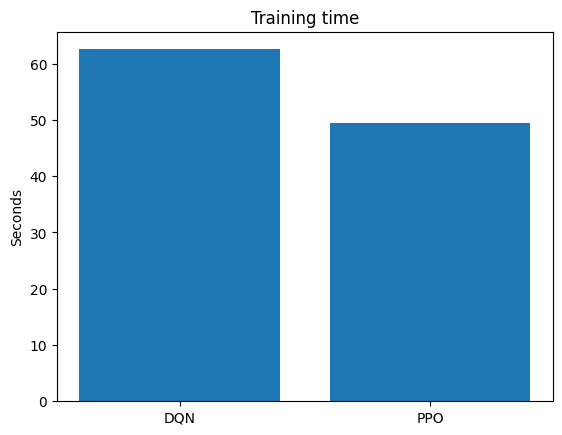

In [12]:
import matplotlib.pyplot as plt

plt.bar(["DQN", "PPO"], [dqn_time, ppo_time])
plt.title("Training time")
plt.ylabel("Seconds")
plt.show()

#Plot rewards per episode for each algorithm

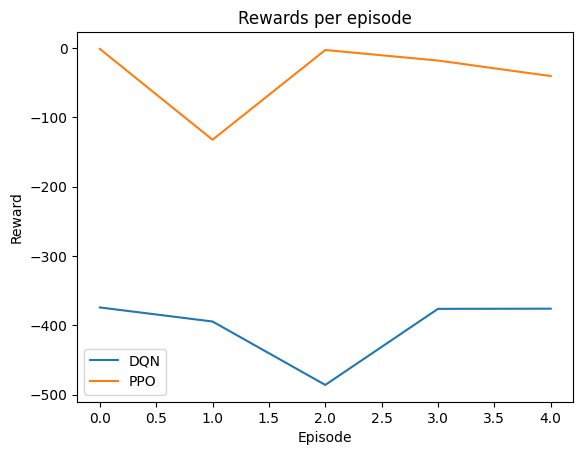

In [13]:
plt.plot(dqn_rewards, label="DQN")
plt.plot(ppo_rewards, label="PPO")
plt.title("Rewards per episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.show()

#Redoing the previous steps but with a different parameters for the algorithms

In [19]:

dqn_env = gym.make("LunarLander-v3", render_mode="rgb_array")
start = time.time()
dqn_model = DQN(
    "MlpPolicy",
    dqn_env,
    buffer_size=200_000,
    learning_starts=10_000,
    batch_size=128,
    gamma=0.99,
    train_freq=4,
    target_update_interval=1_000,
)
dqn_model.learn(total_timesteps=500000, log_interval=400, progress_bar=True)
dqn_time = time.time() - start

dqn_rewards = []
#k = 5
for i in range(k):
    total_reward = 0
    obs, info = dqn_env.reset()
    while True:
      action, _states = dqn_model.predict(obs)
      obs, dqn_reward, terminated, truncated, info = dqn_env.step(action)
      total_reward += dqn_reward

      if terminated or truncated:
        dqn_rewards.append(total_reward)
        print(f"Reward for episode {i}: {total_reward}")
        break

print(f"Mean reward: {np.mean(dqn_rewards)}")



Output()

Reward for episode 0: 6.881569730977618
Reward for episode 1: 121.4907123454834
Reward for episode 2: 178.7602951912109
Reward for episode 3: -12.464351034149441
Reward for episode 4: -5.180554076840725
Mean reward: 57.897534431336354


In [15]:
ppo_env = gym.make("LunarLander-v3", render_mode="rgb_array")
start = time.time()
ppo_model = PPO(
    "MlpPolicy",
    ppo_env,
    n_steps=2048,
    batch_size=64,
    learning_rate=3e-4,
    gamma=0.99,
)
ppo_model.learn(total_timesteps=200000, progress_bar=True)
ppo_time = time.time() - start

ppo_rewards = []
#k = 5
for i in range(k):
    total_reward = 0
    obs, info = ppo_env.reset()
    while True:
      action, _states = ppo_model.predict(obs)
      obs, ppo_reward, terminated, truncated, info = ppo_env.step(action)
      total_reward += ppo_reward

      if terminated or truncated:
        ppo_rewards.append(total_reward)
        print(f"Reward for episode {i}: {total_reward}")
        break

print(f"Mean reward: {np.mean(ppo_rewards)}")

Reward for episode 0: 1.9570012606485534
Reward for episode 1: 219.7600062279874
Reward for episode 2: 222.29247637110794
Reward for episode 3: 208.4274530420605
Reward for episode 4: -19.106470377459488
Mean reward: 126.666093304869


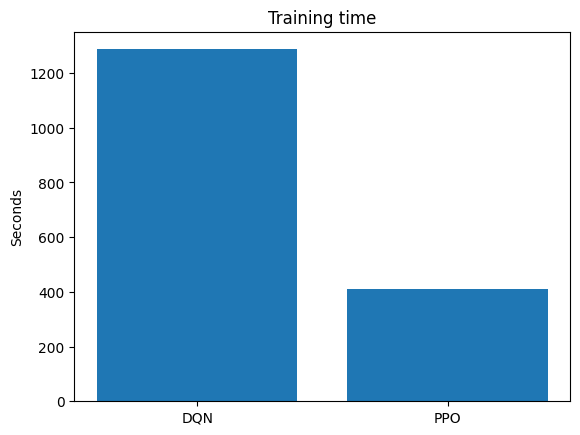

In [22]:
plt.bar(["DQN", "PPO"], [dqn_time, ppo_time])
plt.title("Training time")
plt.ylabel("Seconds")
plt.show()

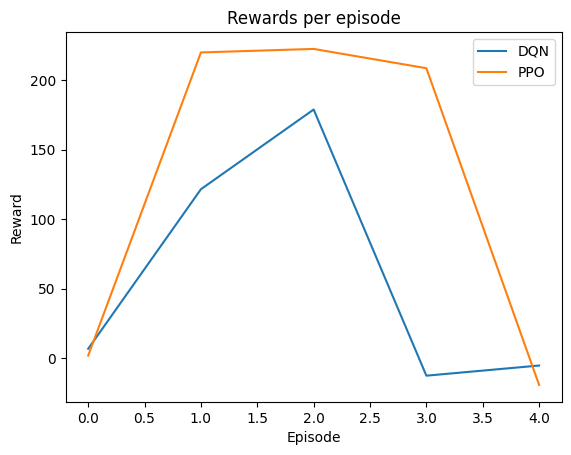

In [23]:
plt.plot(dqn_rewards, label="DQN")
plt.plot(ppo_rewards, label="PPO")
plt.title("Rewards per episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.show()